# Supervised, unsupervised, reifnorcoement learning

In [1]:
# K means is an unsupervised method

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("/Users/vikramjeet/Downloads/income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


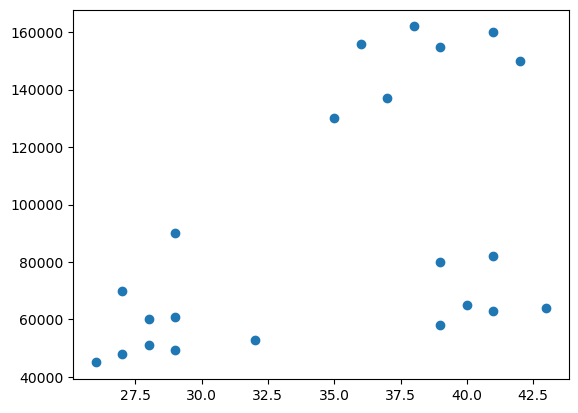

In [4]:
plt.scatter(df['Age'], df['Income($)'])

# We can sort of visually make it out that there are 3 clusters

In [5]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [6]:
#Excluding the name column, we fit and predict directly using the fit_predict method

y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

/Users/vikramjeet/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

The algoritm ran and classified the values into 3 clusters, 0 1 and 2

## Visualizing the array

In [7]:

df['cluster'] = y_pred
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


Text(0.5, 1.0, 'Age vs Income')

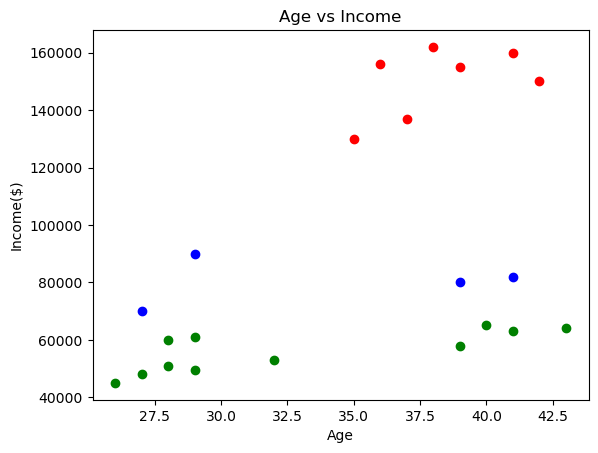

In [8]:
#Seperating these 3 clusters into 3 dataframes

df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='red')
plt.scatter(df3['Age'], df3['Income($)'], color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')

plt.title('Age vs Income')


We can see some scaling issues (Income is very wide whereas age is not). Therefore we need to min max scalre to scale these two features properly and return better values

In [9]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']]) #will try to make income from 0 to 1
df['Income($)'] = scaler.transform(df[['Income($)']]) #transforming the column and overwrite it in the DataFrame

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [10]:
# Again using kmeans clustering with the scaled dataset

km_scaled = KMeans(n_clusters = 3)
y_pred_scaled = km_scaled.fit_predict(df[['Age', 'Income($)']])

y_pred_scaled

/Users/vikramjeet/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [11]:
# Appending the predicted column (clusters) to the dataset

df['cluster_new'] = y_pred_scaled
df

,Name,Age,Income($),cluster,cluster_new
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
4,Kory,0.941176,0.897436,1,2
5,Gautam,0.764706,0.940171,1,2
6,David,0.882353,0.982906,1,2
7,Andrea,0.705882,1.000000,1,2
8,Brad,0.588235,0.948718,1,2
9,Angelina,0.529412,0.726496,1,2


Text(0.5, 1.0, 'Age vs Income')

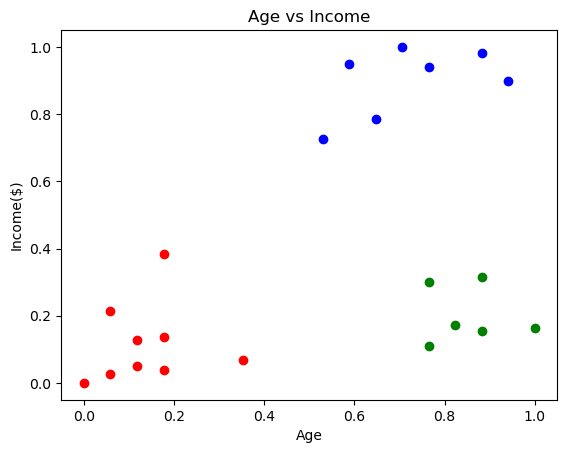

In [12]:
#Seperating these 3 clusters into 3 dataframes

df1_new = df[df['cluster_new']==0]
df2_new = df[df['cluster_new']==1]
df3_new = df[df['cluster_new']==2]

plt.scatter(df1_new['Age'], df1_new['Income($)'], color='green')
plt.scatter(df2_new['Age'], df2_new['Income($)'], color='red')
plt.scatter(df3_new['Age'], df3_new['Income($)'], color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')

plt.title('Age vs Income')


# we can see pretty distinct clusters now

In [13]:
# We can alspo visualize ccentroids

km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

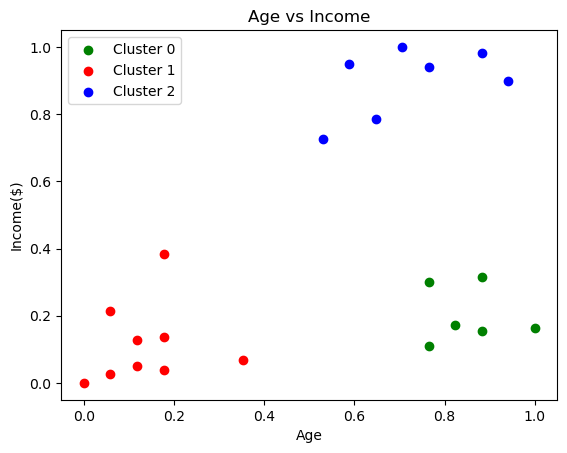

In [18]:
# Plotting the centroids as well

# Filter clusters
df1_new = df[df['cluster_new'] == 0]
df2_new = df[df['cluster_new'] == 1]
df3_new = df[df['cluster_new'] == 2]

# Plot data points
plt.scatter(df1_new['Age'], df1_new['Income($)'], color='green', label='Cluster 0')
plt.scatter(df2_new['Age'], df2_new['Income($)'], color='red', label='Cluster 1')
plt.scatter(df3_new['Age'], df3_new['Income($)'], color='blue', label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Age vs Income')
plt.legend()
plt.show()

# Elbow plot

In [20]:
k_range = range(1,10)
sse = []

for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age', 'Income($)']])
#inertia parameter gives us sum of square error
    sse.append(km.inertia_)

/Users/vikramjeet/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vikramjeet/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vikramjeet/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vikramjeet/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/cluster/

In [21]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.26640301246684156,
 0.2244333448724142,
 0.1685851223602976,
 0.13265419827245162,
 0.10740235405674735]

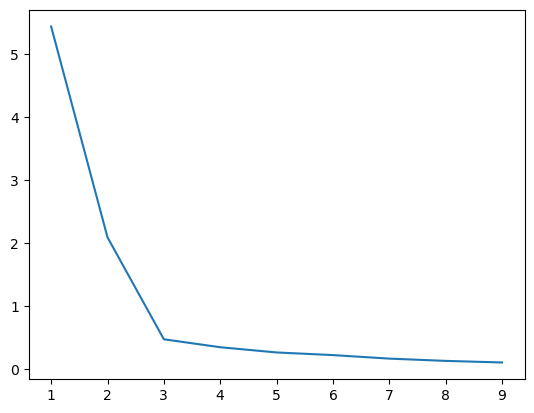

In [23]:
plt.plot(k_range, sse)

# Elbow is at k = 3